In [14]:
#Sales Analysis


Columns and Rows:
(15, 6)

Total Revnue: 
449600

Revenue_by_year: 
year
2023    124300
2024    325300
Name: revenue, dtype: int64

Revnue by shop: 
shop
Shop_A    124300
Shop_C    153600
Shop_B    171700
Name: revenue, dtype: int64

Best_product
product
Laptop    191000
Name: revenue, dtype: int64

Best Shop: Shop_B

Best Category: Electronics

month Revenue: year  month
2023  1        105000
      2         11800
      3          7500
2024  1        148000
      2         15300
      3          8400
      4        134200
      5         19400
Name: revenue, dtype: int64

Highest sales month: (np.int32(2024), np.int32(1))
Revenue in that month: 148000


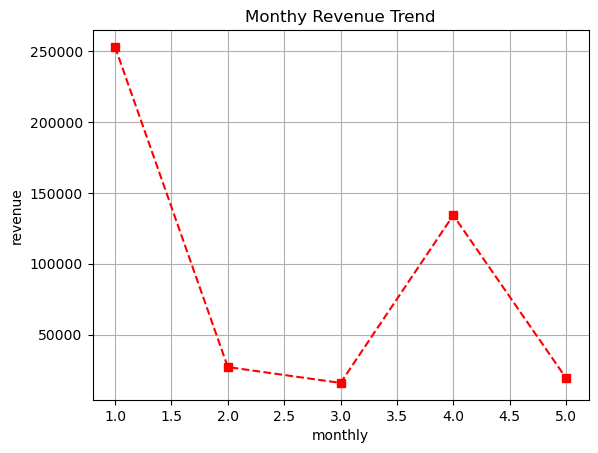

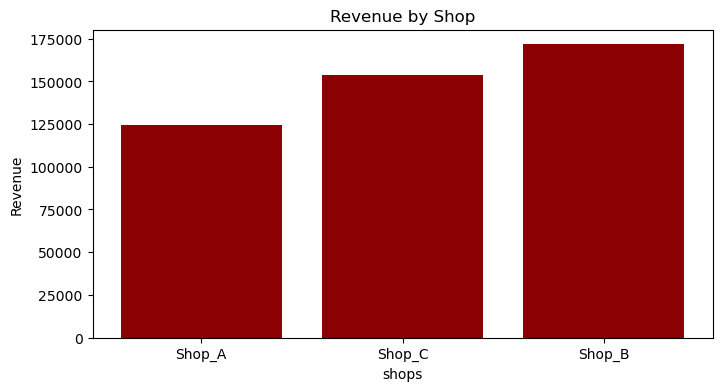

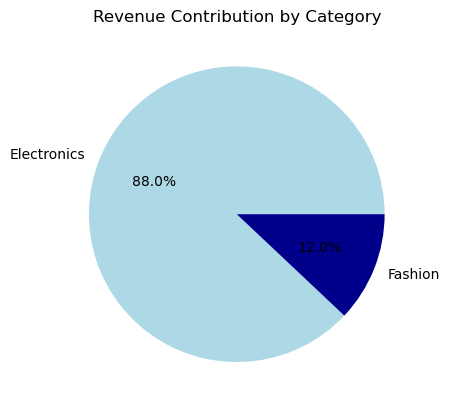

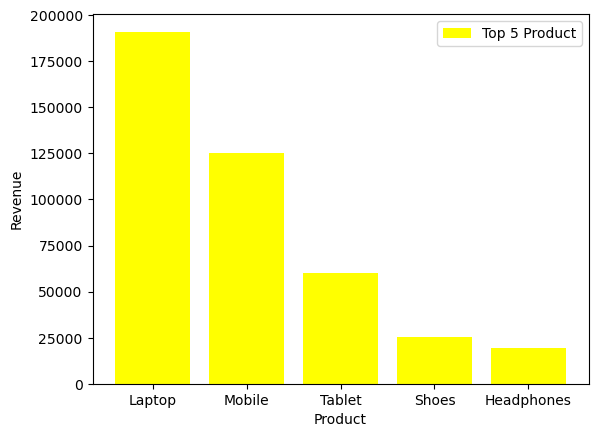

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=pd.read_csv("sales_big.csv")
print("\nColumns and Rows:")
print(df.shape)
df['date']=pd.to_datetime(df['date'])

#Feature Engineering
df['revenue']=df['quantity']*df['price']
#print("\nDATA INFO:")
#print(df.info())
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
#print("\nData After Feature Engineering")
#print(df.head())

#sales perforamnes
print("\nTotal Revnue: ")
print(df['revenue'].sum())

#Revenue by year
revenue_by_year=df.groupby('year')['revenue'].sum()
print("\nRevenue_by_year: ")
print(revenue_by_year)
revenue_by_shop=df.groupby('shop')['revenue'].sum().sort_values(ascending=True)
print("\nRevnue by shop: ")
print(revenue_by_shop)

#Best Selling product
best_product=(
    df.groupby('product')['revenue'].sum()
    .sort_values(ascending=False)
    .head(1)
)
print("\nBest_product")
print(best_product)

#best_shop
best_shop=df.groupby('shop')['revenue'].sum().sort_values(ascending=False).idxmax()
print("\nBest Shop:",best_shop)

best_category=df.groupby('category')['revenue'].sum().sort_values(ascending=False).idxmax()
print("\nBest Category:",best_category)

#Time Analysis
monthly_revenue=df.groupby(['year','month'])['revenue'].sum()
print("\nmonth Revenue:",monthly_revenue)

#which month got highes sales?
best_month=monthly_revenue.idxmax()
best_month_revenue=monthly_revenue.max()
print("\nHighest sales month:", best_month)
print("Revenue in that month:", best_month_revenue)

#Visulations-line chart
Monthly_revenue=df.groupby('month')['revenue'].sum()
plt.plot(Monthly_revenue.index,Monthly_revenue.values,'rs--',label="Trend revenue ")
plt.xlabel("monthly")
plt.ylabel('revenue')
plt.title("Monthy Revenue Trend")
plt.grid(True)


#Bar chart of revenue by shop
plt.figure(figsize=(8,4))
plt.bar(revenue_by_shop.index,revenue_by_shop.values,color='darkred')
plt.xlabel('shops')
plt.ylabel('Revenue')
plt.title('Revenue by Shop')

#pie chart of Category contribution
category_revenue = df.groupby('category')['revenue'].sum()
plt.figure()
colors=["lightblue","darkblue"]
plt.pie(category_revenue,labels=category_revenue.index,colors=colors, autopct='%1.1f%%')
plt.title("Revenue Contribution by Category")
plt.show()

#Bar chart-Top 5 product
top_products=df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(5)
plt.figure()
plt.bar(top_products.index, top_products.values,color='yellow',label="Top 5 Product")
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.legend()


##### 